# EARLY STAGE PREDICTION OF ALZHEIMER'S USING MRI DATA AND MACHINE LEARNING
----

##   DATA
---
The team has found MRI related data that was generated by the Open Access Series of Imaging Studies (OASIS) project that is available both, on their [website](www.oasis-brains.org) that can be utilized for the purpose of training various machine learning models to identify patients with mild to moderate dementia.

## DATASET DESCRIPTION
* We will be using the [longitudinal MRI data](https://www.oasis-brains.org/#oasis2).
* The dataset consists of a longitudinal MRI data of 150 subjects aged 60 to 96.
* Each subject was scanned at least once.
* Everyone is right-handed.
* 72 of the subjects were grouped as 'Nondemented' throughout the study.
* 64 of the subjects were grouped as 'Demented' at the time of their initial visits and remained so throughout the study.
* 14 subjects were grouped as 'Nondemented' at the time of their initial visit and were subsequently characterized as 'Demented' at a later visit. These fall under the 'Converted' category.

## COLUMN DESCRIPTORS  

|COL  |FULL-FORMS                          |
|-----|------------------------------------|
|EDUC |Years of education                  |
|SES  |Socioeconomic Status                |
|MMSE |Mini Mental State Examination       |
|CDR  |Clinical Dementia Rating            |
|eTIV |Estimated Total Intracranial Volume |
|nWBV |Normalize Whole Brain Volume        |
|ASF  |Atlas Scaling Factor                |


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df = pd.read_csv('/content/oasis_longitudinal_demographics.csv')

df.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df = df.loc[df['Visit']==1]

df = df.reset_index(drop=True)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1])

df['Group'] = df['Group'].replace(['Converted'], ['Demented'])

df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0])

df = df.drop(['Subject ID','MRI ID', 'Visit','MR Delay','Hand'], axis=1)
df.head(10)


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,1,1,71,16,NaN,28.0,0.5,1357,0.748,1.293
5,0,0,93,14,2.0,30.0,0.0,1272,0.698,1.380
6,1,1,68,12,2.0,27.0,0.5,1457,0.806,1.205
7,1,0,66,12,3.0,30.0,0.5,1447,0.769,1.213
8,0,0,78,16,2.0,29.0,0.0,1333,0.748,1.316
9,0,0,81,12,4.0,30.0,0.0,1230,0.715,1.427


In [ ]:
import pandas as pd
summary_stats = df.describe().transpose()[['min', 'max', 'mean']]

print(summary_stats.to_markdown())

|       |      min |      max |        mean |
|:------|---------:|---------:|------------:|
| Group |    0     |    1     |    0.52     |
| M/F   |    0     |    1     |    0.413333 |
| Age   |   60     |   96     |   75.4467   |
| EDUC  |    6     |   23     |   14.5333   |
| SES   |    1     |    5     |    2.49296  |
| MMSE  |   17     |   30     |   27.56     |
| CDR   |    0     |    1     |    0.26     |
| eTIV  | 1123     | 1987     | 1474.43     |
| nWBV  |    0.66  |    0.837 |    0.736073 |
| ASF   |    0.883 |    1.563 |    1.20633  |


Text(0.5, 1.0, 'Gender and Demented rate')

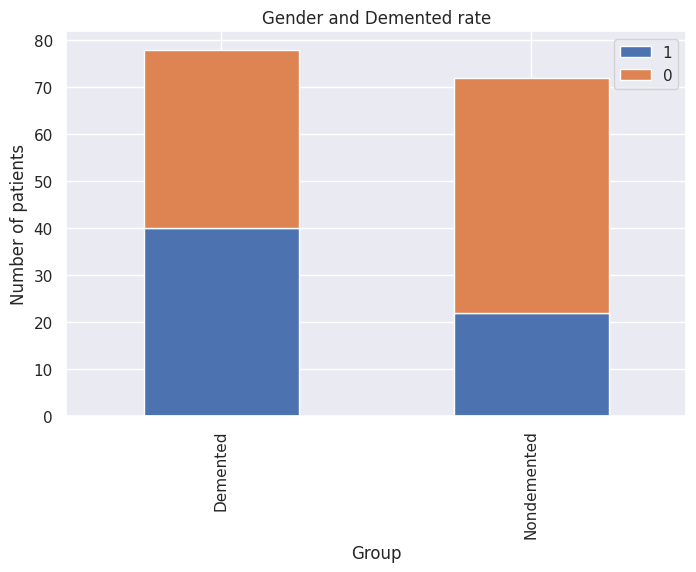

In [ ]:

def bar_chart(feature):

    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()

    df_bar = pd.DataFrame([Demented, Nondemented])
    df_bar.index = ['Demented', 'Nondemented']

    df_bar.plot(kind='bar', stacked=True, figsize=(8, 5))

bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')

plt.legend()
plt.title('Gender and Demented rate')

The above graph indicates that men are more likely with dementia than women.

(15.0, 30.0)

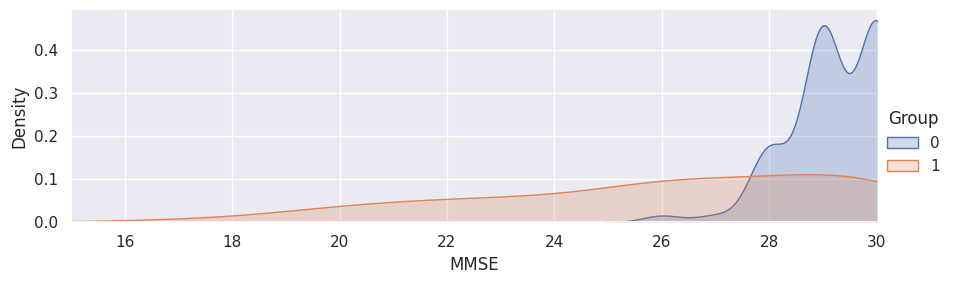

In [ ]:
facet = sns.FacetGrid(df, hue="Group", aspect=3)

facet.map(sns.kdeplot, 'MMSE', fill=True)

facet.set(xlim=(0, df['MMSE'].max()))

facet.add_legend()

plt.xlim(15, 30)

The chart shows Nondemented group got much more higher MMSE scores than Demented group.

(0.6, 0.9)

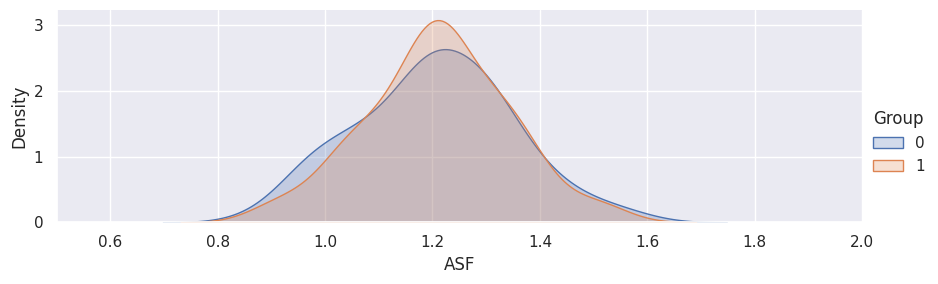

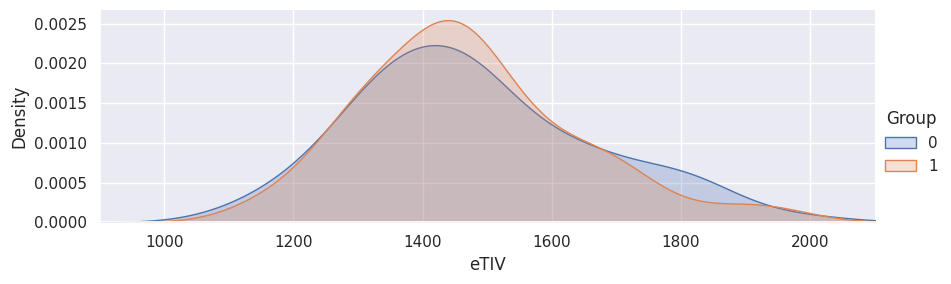

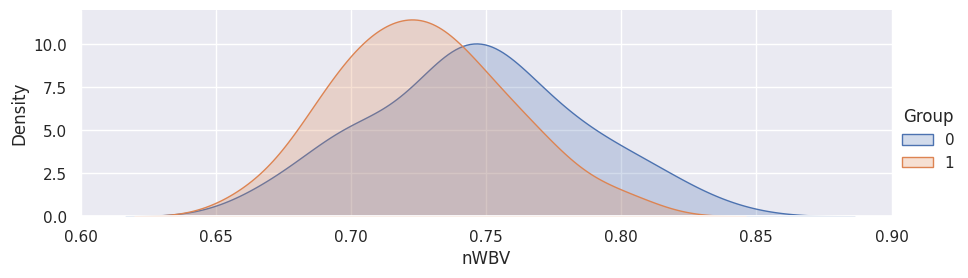

In [ ]:
facet = sns.FacetGrid(df, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'ASF', fill=True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

facet = sns.FacetGrid(df, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'eTIV', fill=True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

facet = sns.FacetGrid(df, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'nWBV', fill=True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6, 0.9)


The chart indicates that Nondemented group has higher brain volume ratio than Demented group. This is assumed to be because the diseases affect the brain to be shrinking its tissue.

(50.0, 100.0)

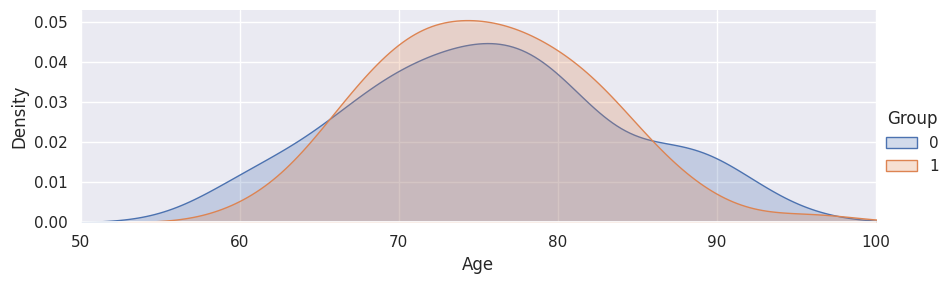

In [ ]:
facet = sns.FacetGrid(df, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'Age', fill=True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50, 100)


There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients.
We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.

(0.0, 0.16)

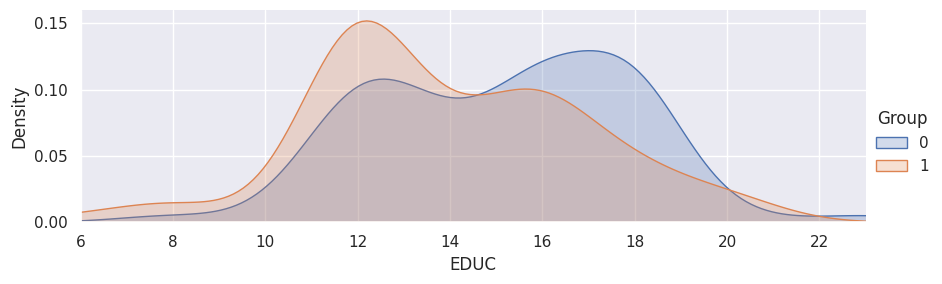

In [ ]:
facet = sns.FacetGrid(df, hue="Group", aspect=3)
facet.map(sns.kdeplot, 'EDUC', fill=True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)


## Intermediate Result Summary
1. Men are more likely with demented, an Alzheimer's Disease, than Women.
2. Demented patients were less educated in terms of years of education.
3. Nondemented group has higher brain volume than Demented group.
4. Higher concentration of 70-80 years old in Demented group than those in the nondemented patients.

#  Data Preprocessing
---
We identified 8 rows with missing values in SES column. We deal with this issue with 2 approaches. One is just to drop the rows with missing values. The other is to replace the missing values with the corresponing values, also known as 'Imputation'. Since we have only 150 data, I assume imputation would help the performance of our model.

In [ ]:
missing_values = pd.isnull(df).sum()

missing_values

Group    0
M/F      0
Age      0
EDUC     0
SES      8
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

##  Removing rows with missing values

In [ ]:
df_dropna = df.dropna(axis=0, how='any')
missing_values_after_drop = pd.isnull(df_dropna).sum()
missing_values_after_drop

Group    0
M/F      0
Age      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
dtype: int64

In [ ]:
group_value_counts = df_dropna['Group'].value_counts()
group_value_counts

0    72
1    70
Name: Group, dtype: int64

##  Imputation

Scikit-learn provides package for imputation, but we do it manually. Since the *SES* is a discrete variable, we use median for the imputation.

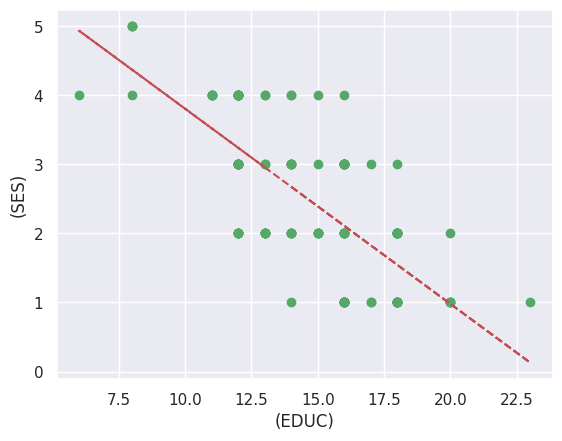

In [ ]:
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('(EDUC)')
plt.ylabel('(SES)')

plt.show()

In [ ]:
educ_ses_median = df.groupby(['EDUC'])['SES'].median()
educ_ses_median

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [ ]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [ ]:
missing_values_check = pd.isnull(df['SES']).value_counts()
missing_values_check

False    150
Name: SES, dtype: int64

##  Splitting Train/Validation/Test Sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [ ]:
#Data with imputation
Y = df['Group'].values
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]

X_trainval, X_test, Y_trainval, Y_test = train_test_split(X, Y, random_state=0)

scaler = MinMaxScaler().fit(X_trainval)

X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

print("X_trainval: ",X_trainval.shape)
print("X_test: ", X_test.shape)
print("Y_trainval: ", Y_trainval.shape)
print("Y_test: ", Y_test.shape)

X_trainval:  (112, 8)
X_test:  (38, 8)
Y_trainval:  (112,)
Y_test:  (38,)


In [ ]:
#Data with Removed rows with missing values
Y = df_dropna['Group'].values
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']]

X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(X, Y, random_state=0)

scaler = MinMaxScaler().fit(X_trainval_dna)

X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)

print("X_trainval: ", X_trainval_dna.shape)
print("X_test: ", X_test_dna.shape)
print("Y_trainval: ", Y_trainval_dna.shape)
print("Y_test: ", Y_test_dna.shape)

X_trainval:  (106, 8)
X_test:  (36, 8)
Y_trainval:  (106,)
Y_test:  (36,)


----
#  MODEL
---

##  Cross-validation
We conduct 5-fold cross-validation to figure out the best parameters for each model, Logistic Regression, SVM, Decision Tree, Random Forests, and AdaBoost. Since our performance metric is accuracy, we find the best tuning parameters by accuracy. In the end, we compare the accuracy, recall and AUC for each model.

##  Performance Measures

We use area under the receiver operating characteristic curve (AUC) as our main performance measure. We believe that in neurodegenerative diseases it is important to have a high true positive rate so that all patients with alzheimer's are identified as early as possible. But we also want to make sure that the false positive rate is as low as possible since we do not want to misdiagnose a healthy adult as demented and begin medical therapy. Hence AUC seemed like a ideal choice for a performance measure.

We will also be looking at accuracy and recall for each model.

In the figure below, you can think relevant elements as actually demented subjects.
Precision and Recall [12]
![Precision and Recall](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

##  Logistic Regression
The parameter C, inverse of regularization strength.

Tuning range: [0.001, 0.1, 1, 10, 100]

The values [0.001, 0.1, 1, 10, 100] represent a range of possible values for the regularization parameter C in logistic regression,, meaning the model is penalized more for having large coefficients. Conversely, larger values of C specify weaker regularization, allowing the model to fit the training data more closely, possibly leading to overfitting.

In [ ]:
acc = []

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [ ]:
best_score = 0
kfolds = 5

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c, max_iter=1000)

    scores = cross_val_score(logRegModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

    score = np.mean(scores)

    if score > best_score:
        best_score = score
        best_parameters = c

SelectedLogRegModel1 = LogisticRegression(C=best_parameters).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedLogRegModel1.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel1.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)

print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)

m = 'Logistic Regression (imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])


Best accuracy on validation set is: 0.7328063241106719
Best parameter for regularization (C) is:  1
Test accuracy with best C parameter is 0.7631578947368421
Test recall with the best C parameter is 0.7
Test AUC with the best C parameter is 0.7666666666666667


In [ ]:
best_score = 0
kfolds = 5

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c, max_iter=1000)

    scores = cross_val_score(logRegModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')

    score = np.mean(scores)

    if score > best_score:
        best_score = score
        best_parameters = c

SelectedLogRegModel2 = LogisticRegression(C=best_parameters).fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = SelectedLogRegModel2.score(X_test_scaled_dna, Y_test_dna)
PredictedOutput = SelectedLogRegModel2.predict(X_test_scaled_dna)
test_recall = recall_score(Y_test_dna, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test_dna, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)

print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)

m = 'Logistic Regression (DropNA)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.725974025974026
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8055555555555556
Test recall with the best C parameter is 0.9411764705882353
Test AUC with the best C parameter is 0.8126934984520124


In overall, dataset with imputation outperforms the one with DropNA. For the later models similar testing is done for better results.

## SVM
C: Penalty parameter C of the error term. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

gamma: kernel coefficient. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

kernel: kernel type. ['rbf', 'linear', 'poly', 'sigmoid']

In [ ]:
best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']:
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter)

            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            score = np.mean(scores)

            if score > best_score:
                best_score = score
                best_parameter_c = c_paramter
                best_parameter_gamma = gamma_paramter
                best_parameter_k = k_parameter

SelectedSVMmodel1 = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedSVMmodel1.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel1.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)

print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test recall with the best parameter is", test_auc)

m = 'SVM (imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on cross validation set is: 0.7687747035573123
Best parameter for c is:  100
Best parameter for gamma is:  0.1
Best parameter for kernel is:  rbf
Test accuracy with the best parameters is 0.8157894736842105
Test recall with the best parameters is 0.7
Test recall with the best parameter is 0.8222222222222222


In [ ]:
best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']:
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter)

            scores = cross_val_score(svmModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')

            score = np.mean(scores)

            if score > best_score:
                best_score = score
                best_parameter_c = c_paramter
                best_parameter_gamma = gamma_paramter
                best_parameter_k = k_parameter

SelectedSVMmodel2 = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = SelectedSVMmodel2.score(X_test_scaled_dna, Y_test_dna)
PredictedOutput = SelectedSVMmodel2.predict(X_test_scaled_dna)
test_recall = recall_score(Y_test_dna, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test_dna, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)

print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test recall with the best parameter is", test_auc)

m = 'SVM (DropNA)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on cross validation set is: 0.7445887445887445
Best parameter for c is:  1000
Best parameter for gamma is:  0.1
Best parameter for kernel is:  sigmoid
Test accuracy with the best parameters is 0.6944444444444444
Test recall with the best parameters is 0.8235294117647058
Test recall with the best parameter is 0.7012383900928792


##  Decision Tree
Maximum depth. [1, 2, ..., 8]

8 is the number of features

In [ ]:
best_score = 0

for md in range(1, 9):
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

    score = np.mean(scores)

    if score > best_score:
        best_score = score
        best_parameter = md

SelectedDTModel1 = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedDTModel1.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel1.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)

print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

m = 'Decision Tree (Imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7770750988142293
Best parameter for the maximum depth is:  1
Test accuracy with best parameter is  0.8157894736842105
Test recall with best parameters is  0.65
Test AUC with the best parameter is  0.825


In [ ]:
feature_importance = np.array([X.columns.values.tolist(), list(SelectedDTModel1.feature_importances_)]).T

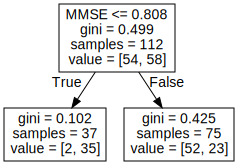

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(SelectedDTModel1, feature_names=X_trainval.columns.values.tolist(), out_file=None)
graph = graphviz.Source(dot_data)
graph

In [ ]:
best_score = 0

for md in range(1, 9):
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    scores = cross_val_score(treeModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')

    score = np.mean(scores)

    if score > best_score:
        best_score = score
        best_parameter = md

SelectedDTModel2 = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = SelectedDTModel2.score(X_test_scaled_dna, Y_test_dna)
PredictedOutput = SelectedDTModel2.predict(X_test_scaled_dna)
test_recall = recall_score(Y_test_dna, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test_dna, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)

print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

m = 'Decision Tree (DropNA)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7445887445887446
Best parameter for the maximum depth is:  1
Test accuracy with best parameter is  0.9166666666666666
Test recall with best parameters is  0.8235294117647058
Test AUC with the best parameter is  0.9117647058823529


In [ ]:
feature_importance = np.array([X.columns.values.tolist(), list(SelectedDTModel2.feature_importances_)]).T

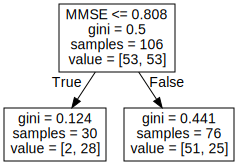

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(SelectedDTModel2, feature_names=X_trainval.columns.values.tolist(), out_file=None)
graph = graphviz.Source(dot_data)
graph

##  Random Forest Classifier
n_estimators(M): the number of trees in the forest

max_features(d): the number of features to consider when looking for the best split

max_depth(m): the maximum depth of the tree.

In [ ]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)

            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set
SelectedRFModel1 = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedRFModel1.predict(X_test_scaled)
test_score = SelectedRFModel1.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest (Imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.8035573122529645
Best parameters of M, d, m are:  2 5 7
Test accuracy with the best parameters is 0.868421052631579
Test recall with the best parameters is: 0.8
Test AUC with the best parameters is: 0.8722222222222222


In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel1.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.03503132427481025'],
       ['Age', '0.09551237125526228'],
       ['EDUC', '0.06261556797214127'],
       ['SES', '0.060620327518549066'],
       ['MMSE', '0.4006565962793097'],
       ['eTIV', '0.07005497528287095'],
       ['nWBV', '0.1460571117936201'],
       ['ASF', '0.1294517256234364']], dtype='<U32')

In [ ]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)

            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set
SelectedRFModel2 = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled_dna, Y_trainval_dna )

PredictedOutput = SelectedRFModel2.predict(X_test_scaled_dna)
test_score = SelectedRFModel2.score(X_test_scaled_dna, Y_test_dna)
test_recall = recall_score(Y_test_dna, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test_dna, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest (DropNA)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7541125541125541
Best parameters of M, d, m are:  2 2 2
Test accuracy with the best parameters is 0.8333333333333334
Test recall with the best parameters is: 0.8823529411764706
Test AUC with the best parameters is: 0.8359133126934984


In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel2.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.06518870645215666'],
       ['Age', '0.11017338285393483'],
       ['EDUC', '0.08412134054767753'],
       ['SES', '0.04601978834913613'],
       ['MMSE', '0.34552275656160714'],
       ['eTIV', '0.07884344729963567'],
       ['nWBV', '0.16500587508974945'],
       ['ASF', '0.10512470284610266']], dtype='<U32')

##  AdaBoost

In [ ]:
best_score = 0

for M in range(2, 15, 2): # combines M trees (WEAK LEARNER)
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(boostModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set
SelectedBoostModel1 = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput1 = SelectedBoostModel1.predict(X_test_scaled)
test_score = SelectedBoostModel1.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput1, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput1, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter of M is: ", best_M)
print("best parameter of LR is: ", best_lr)
print("Test accuracy with the best parameter is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'AdaBoost (imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7770750988142293
Best parameter of M is:  2
best parameter of LR is:  0.0001
Test accuracy with the best parameter is 0.8157894736842105
Test recall with the best parameters is: 0.65
Test AUC with the best parameters is: 0.825


In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel1.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.21428571428571427'],
       ['SES', '0.07142857142857142'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.21428571428571427'],
       ['nWBV', '0.14285714285714285'],
       ['ASF', '0.0']], dtype='<U32')

In [ ]:
best_score = 0

for M in range(2, 15, 2): # combines M trees (WEAK LEARNER)
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(boostModel, X_trainval_scaled_dna, Y_trainval_dna, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set
SelectedBoostModel2 = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled_dna, Y_trainval_dna )

PredictedOutput2 = SelectedBoostModel2.predict(X_test_scaled_dna)
test_score = SelectedBoostModel2.score(X_test_scaled_dna, Y_test_dna)
test_recall = recall_score(Y_test_dna, PredictedOutput2, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test_dna, PredictedOutput2, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter of M is: ", best_M)
print("best parameter of LR is: ", best_lr)
print("Test accuracy with the best parameter is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'AdaBoost (DropNA)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7445887445887446
Best parameter of M is:  2
best parameter of LR is:  0.0001
Test accuracy with the best parameter is 0.8055555555555556
Test recall with the best parameters is: 0.9411764705882353
Test AUC with the best parameters is: 0.8126934984520124


In [ ]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel2.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.14285714285714285'],
       ['SES', '0.07142857142857142'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.0'],
       ['nWBV', '0.35714285714285715'],
       ['ASF', '0.07142857142857142']], dtype='<U32')

# HYBRID MODEL


Test accuracy with the hybrid model: 0.7631578947368421
Test recall with the hybrid model is: 0.7
Test AUC with the hybrid model is: 0.7666666666666667
Precision: 0.8235294117647058
F1 Score: 0.7567567567567567
Confusion Matrix:
 [[15  3]
 [ 6 14]]


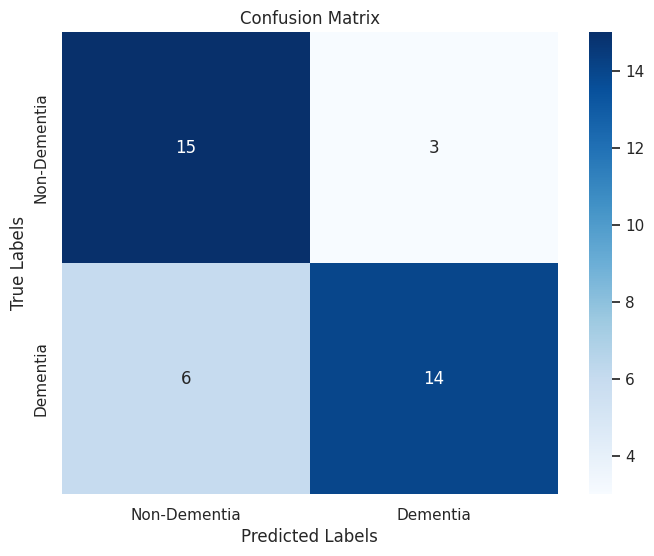

In [ ]:
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

base_models = [
    ('Decision Tree', DecisionTreeClassifier(max_depth=8)),
    ('Random Forest', RandomForestClassifier(n_estimators=2, max_depth=7)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=2, learning_rate=0.0001)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=2, learning_rate=0.0001, max_depth=1)),
    ('KNN', KNeighborsClassifier(n_neighbors=8))
]

# voting classifier
voting_classifier1 = VotingClassifier(estimators=base_models, voting='hard')

voting_classifier1.fit(X_trainval_scaled, Y_trainval)

test_score = voting_classifier1.score(X_test_scaled, Y_test)
predictions = voting_classifier1.predict(X_test_scaled)
precision = precision_score(Y_test, predictions)
test_recall = recall_score(Y_test, predictions, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, predictions, pos_label=1)
test_auc = auc(fpr, tpr)

f1 = f1_score(Y_test, predictions)
conf_matrix = confusion_matrix(Y_test, predictions)

print("Test accuracy with the hybrid model:", test_score)
print("Test recall with the hybrid model is:", test_recall)
print("Test AUC with the hybrid model is:", test_auc)
print("Precision:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Dementia", "Dementia"],yticklabels=["Non-Dementia", "Dementia"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

m = 'Hybrid Model (Voting Classifier) w (imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Test accuracy with the hybrid model: 0.8888888888888888
Test recall with the hybrid model is: 0.8823529411764706
Test AUC with the hybrid model is: 0.8885448916408668
Precision: 0.8823529411764706
F1 Score: 0.8823529411764706
Confusion Matrix:
 [[17  2]
 [ 2 15]]


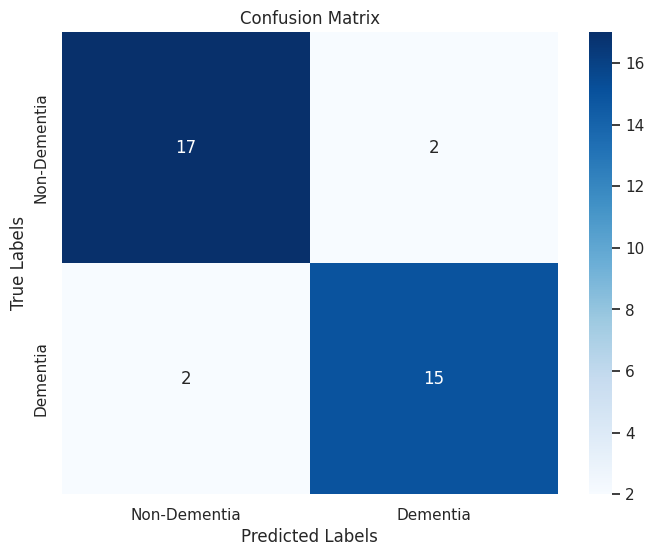

In [ ]:
from sklearn.metrics import precision_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

base_models = [
    ('Decision Tree', DecisionTreeClassifier(max_depth=8)),
    ('Random Forest', RandomForestClassifier(n_estimators=2, max_depth=7)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=2, learning_rate=0.0001)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=2, learning_rate=0.0001, max_depth=1)),
    ('KNN', KNeighborsClassifier(n_neighbors=8))
]

# voting classifier
voting_classifier2 = VotingClassifier(estimators=base_models, voting='hard')

voting_classifier2.fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = voting_classifier2.score(X_test_scaled_dna, Y_test_dna)
predictions = voting_classifier2.predict(X_test_scaled_dna)
precision = precision_score(Y_test_dna, predictions)
test_recall = recall_score(Y_test_dna, predictions, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test_dna, predictions, pos_label=1)
test_auc = auc(fpr, tpr)

f1 = f1_score(Y_test_dna, predictions)
conf_matrix = confusion_matrix(Y_test_dna, predictions)

print("Test accuracy with the hybrid model:", test_score)
print("Test recall with the hybrid model is:", test_recall)
print("Test AUC with the hybrid model is:", test_auc)
print("Precision:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Dementia", "Dementia"],yticklabels=["Non-Dementia", "Dementia"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

m = 'Hybrid Model (Voting Classifier) w (DropNa)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Test accuracy with the hybrid model: 0.9722222222222222
Test recall with the hybrid model is: 0.9411764705882353
Test AUC with the hybrid model is: 0.9705882352941176
Precision: 1.0
F1 Score: 0.9696969696969697
Confusion Matrix:
 [[19  0]
 [ 1 16]]


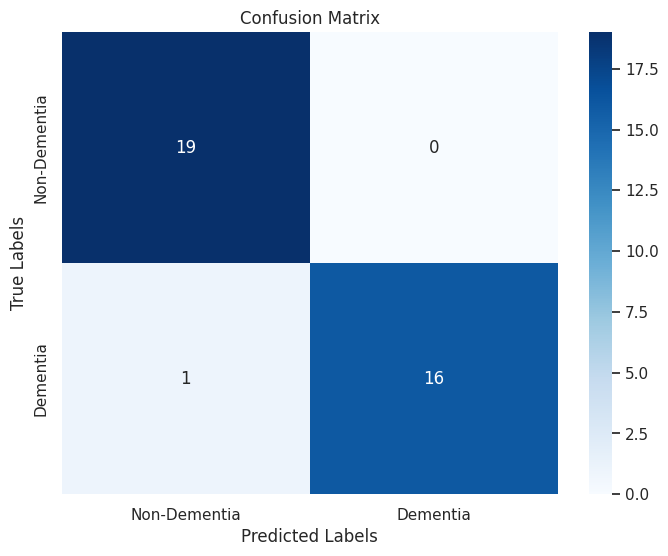

In [ ]:
base_models = [
    ('Hybrid Model (Voting Classifier) w (DropNa)', voting_classifier2),
    ('Random Forest (Imputation)',SelectedRFModel1),
    ('Decision Tree (DropNA)', SelectedDTModel2),
    ('AdaBoost (DropNA)',SelectedBoostModel2),
    ('Logistic Regression (DropNA)', SelectedLogRegModel2),
]

# voting classifier
voting_classifier3 = VotingClassifier(estimators=base_models, voting='hard')

voting_classifier3.fit(X_trainval_scaled_dna, Y_trainval_dna)

test_score = voting_classifier3.score(X_test_scaled_dna, Y_test_dna)
predictions = voting_classifier3.predict(X_test_scaled_dna)
precision = precision_score(Y_test_dna, predictions)
test_recall = recall_score(Y_test_dna, predictions, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test_dna, predictions, pos_label=1)
test_auc = auc(fpr, tpr)

f1 = f1_score(Y_test_dna, predictions)
conf_matrix = confusion_matrix(Y_test_dna, predictions)

print("Test accuracy with the hybrid model:", test_score)
print("Test recall with the hybrid model is:", test_recall)
print("Test AUC with the hybrid model is:", test_auc)
print("Precision:", precision)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Dementia", "Dementia"],yticklabels=["Non-Dementia", "Dementia"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

m = 'Hybrid Model (Voting Classifier) w (CUSTOM)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

In [ ]:
# Performance Metric for each model
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'AUC']]

,Model,Accuracy,Recall,AUC
0,Logistic Regression (imputation),0.763158,0.700000,0.766667
1,Logistic Regression (DropNA),0.805556,0.941176,0.812693
2,SVM (imputation),0.815789,0.700000,0.822222
3,SVM (DropNA),0.694444,0.823529,0.701238
4,Decision Tree (Imputation),0.815789,0.650000,0.825000
5,Decision Tree (DropNA),0.916667,0.823529,0.911765
6,Random Forest (Imputation),0.868421,0.800000,0.872222
7,Random Forest (DropNA),0.833333,0.882353,0.835913
8,AdaBoost (imputation),0.815789,0.650000,0.825000
9,AdaBoost (DropNA),0.805556,0.941176,0.812693


In [ ]:

user_input = {
    'M/F': 'F',
    'Age': 82,
    'EDUC': 16,
    'SES': 1,
    'MMSE': 32,
    'CDR': 0,
    'eTIV': 1460,
    'nWBV': 0.695,
    'ASF': 1.202
}
scaler = MinMaxScaler().fit([[0,0,0,0,0,0,0,0]])

def preprocess_input(user_input):

    user_input['M/F'] = 1 if user_input['M/F'] == 'M' else 0
    scaled_input = scaler.transform([[user_input['Age'], user_input['EDUC'], user_input['SES'],
                                      user_input['MMSE'], user_input['CDR'], user_input['eTIV'],
                                      user_input['nWBV'], user_input['ASF']]])
    return scaled_input


X_custom_input = preprocess_input(user_input)
prediction = voting_classifier3.predict(X_custom_input)

if prediction == 1:
    print("Prediction: Dementia")
else:
    print("Prediction: Non-Dementia")


Prediction: Dementia


In [ ]:
from google.colab import files
import joblib

joblib.dump(voting_classifier3, 'voting_classifier3.pkl')
files.download('voting_classifier3.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>